In [1]:
from math import *
import operator
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)

from scipy import stats

In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.2


# Gaussian distribution

- loc   : [float or array_like]Mean of the distribution. 

- scale : [float or array_like]Standard deviation of the distribution. 

- size  : [int or int tuples]. 

Output shape given as (m, n, k) then m*n*k samples are drawn. If size is 
None(by default), then a single value is returned. 

In [3]:
N = 100

In [4]:
# Gaussian distributed data with mean = 2 and var = 1
mu1, sigma1 = 2, 1
N = 100
s1 = np.random.normal(mu1, sigma1, N)
s1.mean(), s1.std()

(1.9186907844788559, 0.9287773184834665)

In [5]:
# Gaussian distributed data with mean = 0 and var = 1
mu2, sigma2 = 0, 1

s2 = np.random.normal(mu2, sigma2, N)
s2.mean(), s2.std()

(0.009971036332084716, 0.9360939444842509)

C:\Users\Satnam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


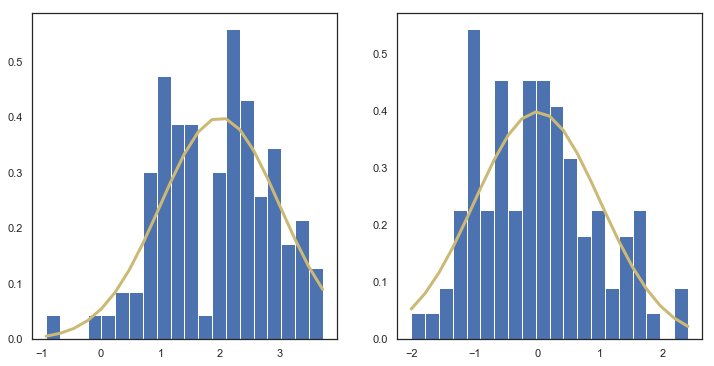

In [6]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Create the bins and histogram
count, bins, ignored = ax1.hist(s1, 20, normed=True)

# Plot the distribution curve
ax1.plot(bins, 
         1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ), 
         linewidth=3, 
         color='y');

# Create the bins and histogram
count, bins, ignored = ax2.hist(s2, 20, normed=True)

# Plot the distribution curve
ax2.plot(bins, 
         1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ), 
         linewidth=3, 
         color='y');

In [7]:
# calculate means
mean1, mean2 = np.mean(s1), np.mean(s2)

In [8]:
# calculate standard errors
se1, se2 = scipy.stats.sem(s1), scipy.stats.sem(s2)

In [9]:
# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)

In [10]:
# calculate the t statistic
t_stat = (mean1 - mean2) / sed
t_stat

12.814005825555117

In [11]:
# degrees of freedom
degree_freedom = len(s1) + len(s2) - 2
degree_freedom

198

In [12]:
# calculate the critical value
alpha = 0.05
cv = scipy.stats.t.ppf(1.0 - alpha, degree_freedom)
cv

1.6525857836172075

In [13]:
# calculate the p-value
p = (1.0 - scipy.stats.t.cdf(abs(t_stat), degree_freedom)) * 2.0
p

0.0

In [14]:
# compare samples
print('t=%15.8f, p=%15.8f' % (t_stat, p))

# interpret via critical value
if abs(t_stat) <= cv:
    print('CV      : Accept null hypothesis --> the means are equal.')
else:
    print('CV      : Reject the null hypothesis --> the means are NOT equal.')
    
# interpret via p-value
if p > alpha:
    print('p-value : Accept null hypothesis --> the means are equal.')
else:
    print('p-value : Reject the null hypothesis --> the means are NOT equal.')

t=    12.81400583, p=     0.00000000
CV      : Reject the null hypothesis --> the means are NOT equal.
p-value : Reject the null hypothesis --> the means are NOT equal.


### using scipy

In [15]:
stats.ttest_ind(s1, s2)

Ttest_indResult(statistic=12.814005825555117, pvalue=9.044274246693416e-28)